# Aprendizaje no supervisado - Clustering
- Preguntas a responder
  - ¿Cómo están ubicados tus datos?
  - ¿Requieres grupos?
  - ¿Requieres elementos representativos, información en común?
    - ¿Requieres excepciones ("outliers")?
    - ¿Cómo escoger un buen número de grupos?

# Unsupervised Learning
https://www.youtube.com/watch?v=w_aUCJHRv0Y&t=387s

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [18]:
import sklearn
from sklearn.datasets import make_blobs, make_moons
import numpy as np

# Crear los datos con el numero de centros útiles

In [43]:
x, y = make_blobs(n_samples=1000, n_features=100, 
                  centers=5, cluster_std=10, 
                  shuffle=True, random_state=0)
xm, ym = make_moons(n_samples=1000)

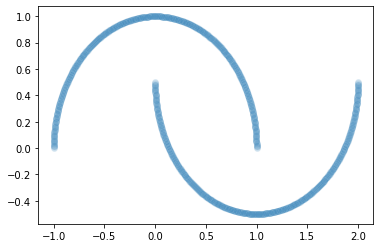

In [24]:
plt.scatter(xm[:, 0], xm[:, 1], alpha=0.1)

In [26]:
from sklearn.decomposition import PCA
pca = PCA()
X_transform = pca.fit_transform(X=x)

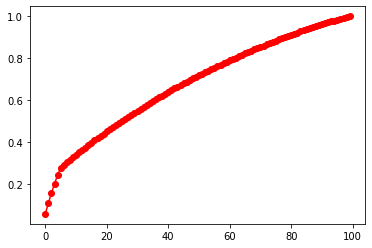

In [27]:
plt.plot(pca.explained_variance_ratio_.cumsum(),'ro-')
plt.show()

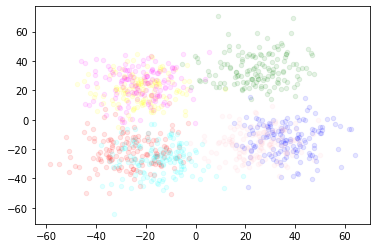

In [35]:
colors = ['red','yellow','green','cyan','blue','magenta','pink']
for ci, c in enumerate(np.unique(y)):
    scatter(X_transform[y==c, 0], X_transform[y==c, 1], c=colors[ci], marker='o', s=20, alpha=0.1)

# Crear la instancia de KMeans con el número de centros que creamos necesarios

Utilizando k-means++ para inicializar las seed

In [31]:
from sklearn.cluster import KMeans

In [33]:
kame = KMeans(n_clusters=7, init='k-means++',
              max_iter=1000, tol=1e-4)
y_predict = kame.fit_predict(x)

In [173]:
print('%d de %d' %(np.sum(y == y_predict), y.shape[0]))
print(np.sum(y == y_predict) / y.shape[0])

18317 de 50000
0.36634


# Etiquetas y Centroides

In [153]:
print(kame.labels_)
print(kame.cluster_centers_)

[0 0 0 ..., 1 1 0]
[[-1.58884376  2.90597079]
 [ 2.05642012  0.87528469]
 [ 1.0272997   4.36139358]]


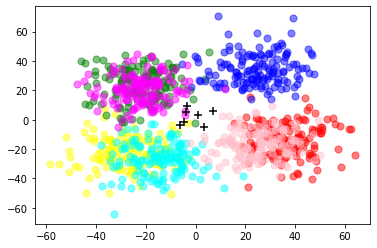

In [37]:
for ci, c in enumerate(np.unique(y_predict)):
    scatter(X_transform[y_predict==c, 0], X_transform[y_predict==c, 1], c=colors[ci], marker='o', s=50, alpha=0.5)
scatter(kame.cluster_centers_[:, 0], kame.cluster_centers_[:, 1], s=50, marker='+', c='black')

# Iniciando los clusters manualmente

In [157]:
x_init = np.array([[1, 5], [2, 5], [3, 5]])
km4 = KMeans(n_clusters=3, init=x_init, n_init=1, 
             max_iter=100, tol=1e-4)
y_pred2 = km4.fit_predict(x)

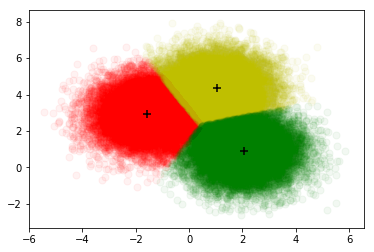

In [158]:
for ci, c in enumerate(np.unique(y_pred2)):
    scatter(x[y_pred2==c, 0], x[y_pred2==c, 1], c=colors[ci], marker='o', s=50, alpha=0.05)
scatter(km4.cluster_centers_[:, 0], km4.cluster_centers_[:, 1], s=50, marker='+', c='black')

# Mas centros

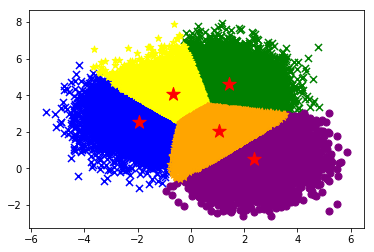

In [159]:
km5 = KMeans(n_clusters=5, init='k-means++', n_init=1, 
             max_iter=100, tol=1e-4)
y_pred3 = km5.fit_predict(x)
scatter(x[y_pred3==0, 0], x[y_pred3==0,1 ], s=50, c='green', marker='x', label='cluster 1')
scatter(x[y_pred3==1, 0], x[y_pred3==1,1 ], s=50, c='purple', marker='o', label='cluster 2')
scatter(x[y_pred3==2, 0], x[y_pred3==2,1 ], s=50, c='blue', marker='x', label='cluster 3')
scatter(x[y_pred3==3, 0], x[y_pred3==3,1 ], s=50, c='yellow', marker='*', label='cluster 4')
scatter(x[y_pred3==4, 0], x[y_pred3==4,1 ], s=50, c='orange', marker='*', label='cluster 5')
scatter(km5.cluster_centers_[:, 0], km5.cluster_centers_[:, 1], s=200, marker='*', c='red')

# Revisar el rendimiento del número de clusters creados:

- Optimizar el número de clusters para no crear clusters que no existen. Nota(un punto de inflexion)

Text(0, 0.5, 'Inercia')

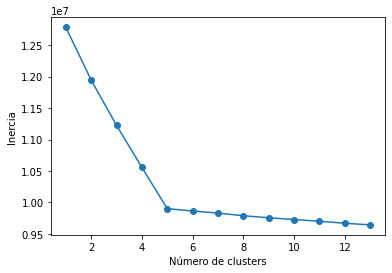

In [44]:
#x_test, y_test = make_blobs(n_samples=200, n_features=2,
#                            centers=5, cluster_std=0.45,
#                            shuffle=True)
inertias = []
for i in range(1, 14):
    km_test = KMeans(n_clusters=i,
                     init='k-means++',
                     max_iter=100,
                     tol=1e-4,
                     random_state=0)
    km_test.fit(x)
    inertias.append(km_test.inertia_)
plot(range(1, 14), inertias, marker='o')
xlabel('Número de clusters')
ylabel('Inercia')

# FIN!

otro ejemplo

y_km_7 = y_test
x_7 = x_test
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_km_7)
n_clusters = cluster_labels.shape[0]
silhouette = silhouette_samples(x_7, y_km_7,
                                metric='euclidean')
y_top = 0
y_bottom = 0
y_ticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette = silhouette[y_km_7 == c]
    c_silhouette.sort()
    y_top += len(c_silhouette)
    color = cm.jet(i/n_clusters*1.)
    barh(range(y_bottom, y_top), c_silhouette, height=1,
         edgecolor='none', color=color)
    y_ticks.append((y_top + y_bottom)/2)
    y_bottom += len(c_silhouette)
silhouette_mean = np.mean(silhouette)
axvline(silhouette_mean, color='blue', linestyle='--')
yticks(y_ticks, cluster_labels + 1)
ylabel('Clusters')
xlabel('Silhouette coefficient')
